# Week 6 Excercises

In [1]:
import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import HTML
from IPython.display import Image
from sklearn import svm, tree
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [24, 12]
plt.style.use(
"seaborn-darkgrid"
) 
random.seed(11)

In [2]:
df = pd.read_csv("caesarian.csv")
dct = {}
for col in df.columns:
    dct[col] = col.strip()
df.rename(columns=dct, inplace=True)
df.drop(columns=["age"], inplace=True)

## Problem 1 
### a: 
Using the delivery number, delivery time, blood pressure and heart problem features, please manually create the first two levels of the decision tree that can be used to predict the target. You may code up any formulas you find necessary and submit your answer via scan of your handwritten answer or a suitable digital solution. You final answer should be in the form:

In [3]:
def gini(c, cn):
    n = pd.Series(cn).sum()
    sm = 0
    for i in range(c):
        sm += (cn[i] / n) * (1 - (cn[i] / n))
    return sm


print(gini(2, [5, 5]))
print(gini(2, [22, 28]))
print(gini(2, [24, 6]))

0.5
0.4928
0.32


In [4]:
no_heart_problems = df[df["heart problem"] < 1]
with_heart_problems = df[df["heart problem"] >= 1]
print(no_heart_problems.caesarian.value_counts())
print(with_heart_problems.caesarian.value_counts())

0    28
1    22
Name: caesarian, dtype: int64
1    24
0     6
Name: caesarian, dtype: int64


In [5]:
print(
    "Delivery Number <= 2 \n",
    no_heart_problems[
        no_heart_problems["delivery number"] <= 2
    ].caesarian.value_counts(),
)
print(
    "Delivery Number >  2\n",
    no_heart_problems[
        no_heart_problems["delivery number"] > 2
    ].caesarian.value_counts(),
)

Delivery Number <= 2 
 0    27
1    18
Name: caesarian, dtype: int64
Delivery Number >  2
 1    4
0    1
Name: caesarian, dtype: int64


In [6]:
no_heart_problems.groupby(["delivery number", "caesarian"]).count()

delivery time  blood pressure  heart problem
delivery number caesarian                                              
1               0                     17              17             17
                1                     12              12             12
2               0                     10              10             10
                1                      6               6              6
3               0                      1               1              1
                1                      3               3              3
4               1                      1               1              1

In [7]:
print(
    "Delivery Number <= 2 \n",
    with_heart_problems[
        with_heart_problems["delivery number"] <= 2
    ].caesarian.value_counts(),
)
print(
    "Delivery Number >  2\n",
    with_heart_problems[
        with_heart_problems["delivery number"] > 2
    ].caesarian.value_counts(),
)

Delivery Number <= 2 
 1    19
0     4
Name: caesarian, dtype: int64
Delivery Number >  2
 1    5
0    2
Name: caesarian, dtype: int64


In [8]:
Image(url="problem1a.png", width=800, height=600)

### b.
Using the DecisionTreeClassifier in SKlearn, please train a classifier over the dataset using max_depth=2 and max_depth=4 and use a package to visualize the resulting decision tree (plot_tree is pretty handy, but there are others). Why might you want to vary the depth of the decision tree? This may be submitted in a .py file or a Jupyter Notebook.


[Text(669.6, 543.6, 'X[3] <= 0.5\ngini = 0.489\nsamples = 80\nvalue = [34, 46]'),
 Text(334.8, 326.16, 'X[0] <= 2.5\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(167.4, 108.72000000000003, 'gini = 0.48\nsamples = 45\nvalue = [27, 18]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(1004.4000000000001, 326.16, 'X[2] <= 0.5\ngini = 0.32\nsamples = 30\nvalue = [6, 24]'),
 Text(837.0, 108.72000000000003, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(1171.8, 108.72000000000003, 'gini = 0.408\nsamples = 21\nvalue = [6, 15]')]

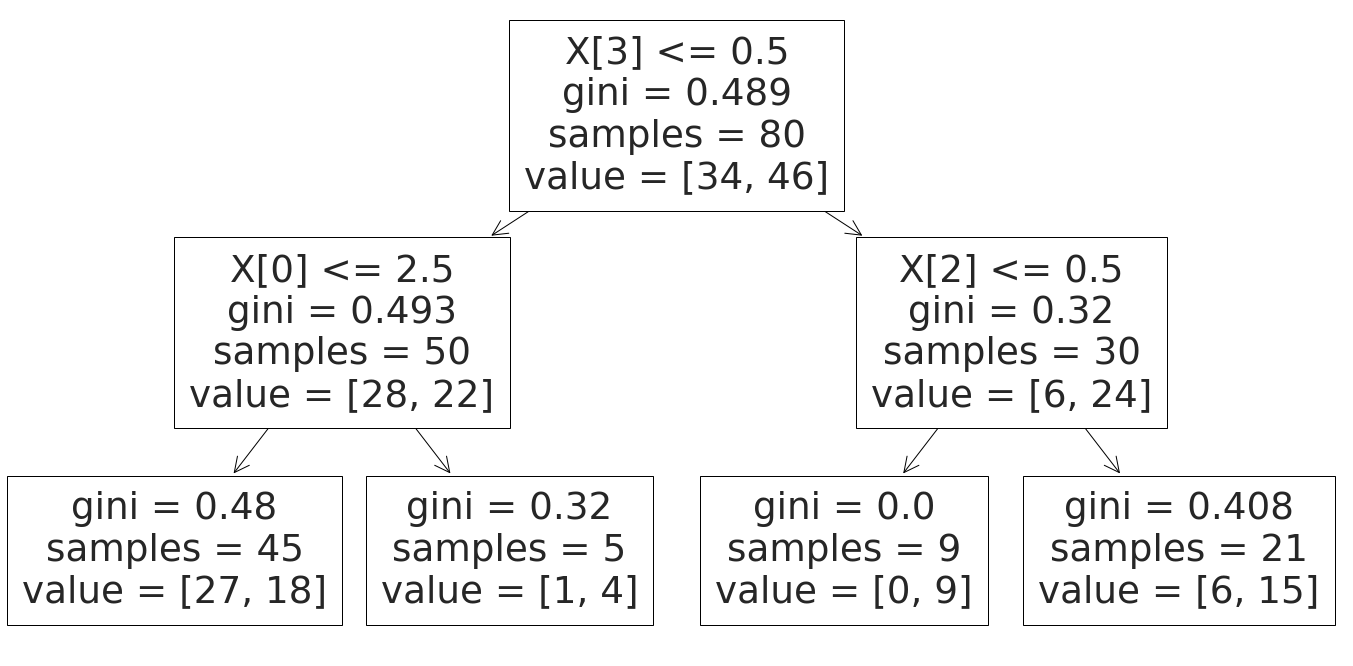

In [9]:
cols = ["delivery number", "delivery time", "blood pressure", "heart problem"]
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(df[cols], df.caesarian)
tree.plot_tree(clf)

[Text(725.4000000000001, 587.0880000000001, 'X[3] <= 0.5\ngini = 0.489\nsamples = 80\nvalue = [34, 46]'),
 Text(483.6, 456.624, 'X[0] <= 2.5\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(297.6, 326.1600000000001, 'X[2] <= 0.5\ngini = 0.48\nsamples = 45\nvalue = [27, 18]'),
 Text(148.8, 195.69600000000003, 'X[1] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(74.4, 65.23200000000008, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.23200000000008, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(446.40000000000003, 195.69600000000003, 'X[2] <= 1.5\ngini = 0.457\nsamples = 34\nvalue = [22, 12]'),
 Text(372.0, 65.23200000000008, 'gini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(520.8000000000001, 65.23200000000008, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(669.6, 326.1600000000001, 'X[1] <= 1.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(595.2, 195.69600000000003, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(744.0, 1

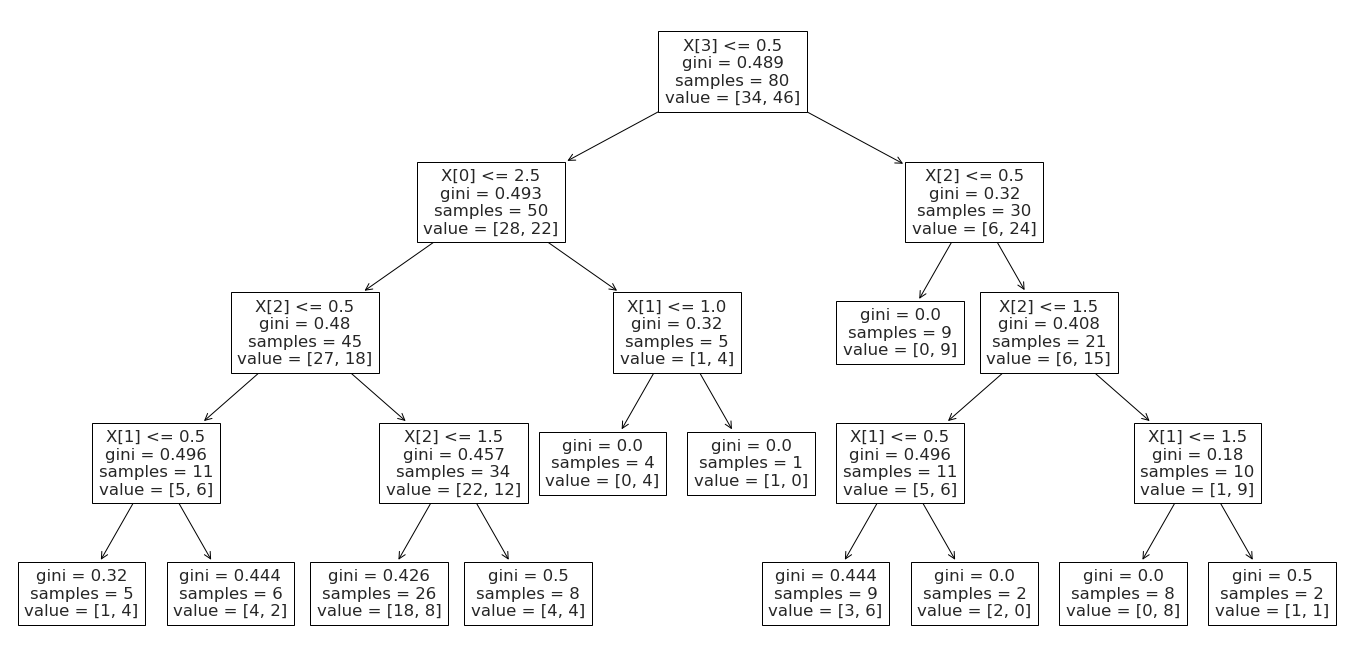

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=4)
clf = clf.fit(df[cols], df.caesarian)
tree.plot_tree(clf)

#### As we increase the depth of tree the accuracy of the model increases. However with increasing depth, complexity will increase, and also the model might overfit for training data.

## Problem -2 : 
Support Vector Machines are a more generalized form of Logistic Regression due to the kernel transformations that can "bend" vector space in a way such that linear classification can be more effective. An additional problem arises since tuning the parameters of the kernel function is very computationally expensive. In the age of big data, the SVMs have decreased in popularity.
Please use the iris-slwc.txt as the dataset for this problem. There are two independent features with the target column. The targets are either 1 or -1.
To understand the tuning process, please create a 5-fold cross-valdiation test where you test at least two different parameter sets for the following kernel functions of the SVC model: linear, polynomial and rbf. Use F1-score as your metric. Please generate a table of what kernel, parameters, mean test score you generated for each experiment. Plot the dataset with one class's points as blue and the other class's points as red. Add the best classifier to show how well the classification function you found separates the two classes. This problem may be completed using a .py file or a Jupyter Notebook.

#### Load dataset

In [11]:
df = pd.read_csv("iris-slwc.txt", header=None, names=["x1", "x2", "y"])
data = np.array(df[["x1", "x2"]])
target = np.array(df["y"])

#### Function to train model and test with test data set

In [12]:
def apply_model(svc, data, target):
    kf = KFold(n_splits=5, shuffle=True)
    f_score_total = 0
    for train_index, test_index in kf.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        f_score = f1_score(y_test, y_pred)
        f_score_total += f_score
        # print("F-Score:", f_score)
        ax = sns.scatterplot(
            X_test[:, 0],
            X_test[:, 1],
            markers=True,
            hue=y_pred,
            palette={1: "red", -1: "blue"},
        )

    kwargs = {
        "edgecolor": "black",
        "facecolor": "none",
        "linewidth": 1,
    }
    ax = sns.scatterplot(
        svc.support_vectors_[:, 0],
        svc.support_vectors_[:, 1],
        alpha=0.6,
        s=100,
        **kwargs
    )

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

    #    ax.set(facecolors='none', edgecolors='red')
    ax.legend(["1", "-1"])
    ax.set(title="Predicted Classification with support vectors")
    plt.show()
    return f_score_total / 5

#### Testing with kernel type "linear" with 2 max-iterations and C=10

Model SVC(C=10, kernel='linear', max_iter=2)


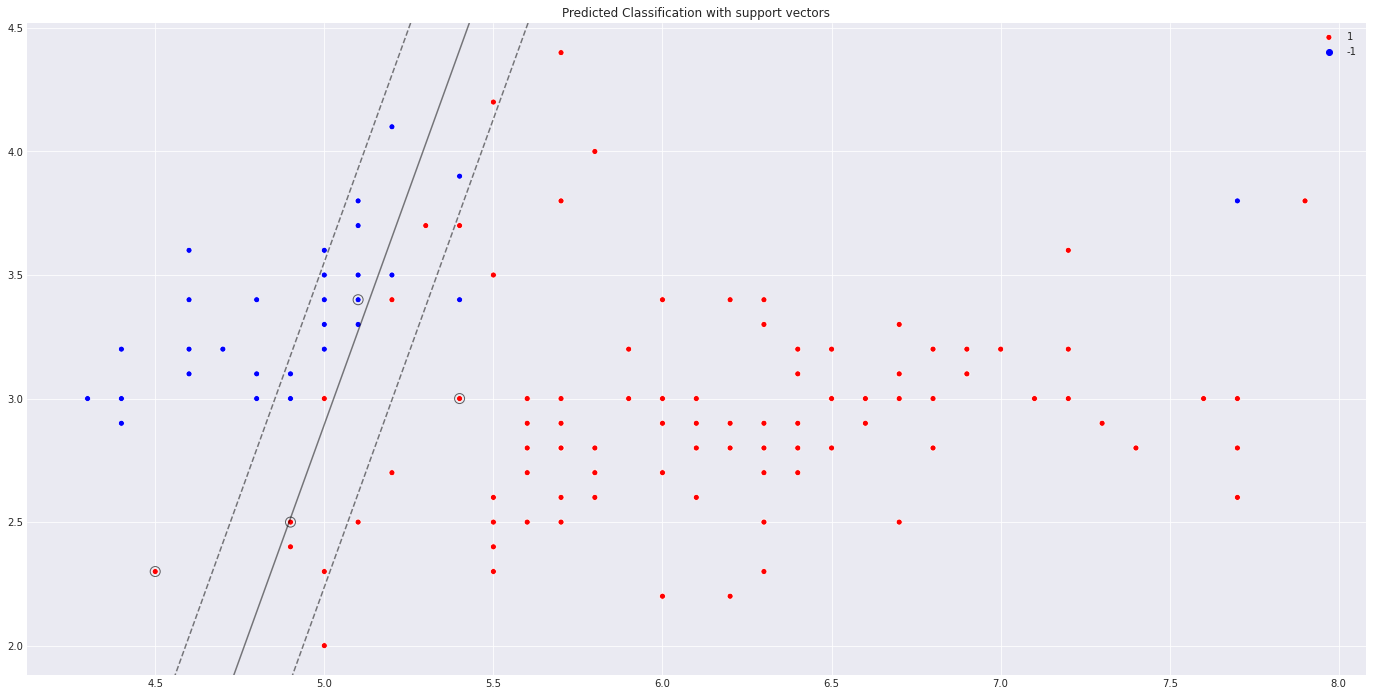

Average F1-Score 0.944522691915072


In [13]:
observations = []
svc = svm.SVC(
    kernel="linear", max_iter=2, C=10
)  # c=1, tol=10**-2, max_iter making difference,tol=10**-3
print("Model", svc)
avg_score = apply_model(svc, data, target)
print(f"Average F1-Score {avg_score}")
observations.append(["linear", "2", avg_score])

#### Testing with kernel type "linear" with 20 max-iterations and C=20

Model SVC(C=20, kernel='linear', max_iter=20)


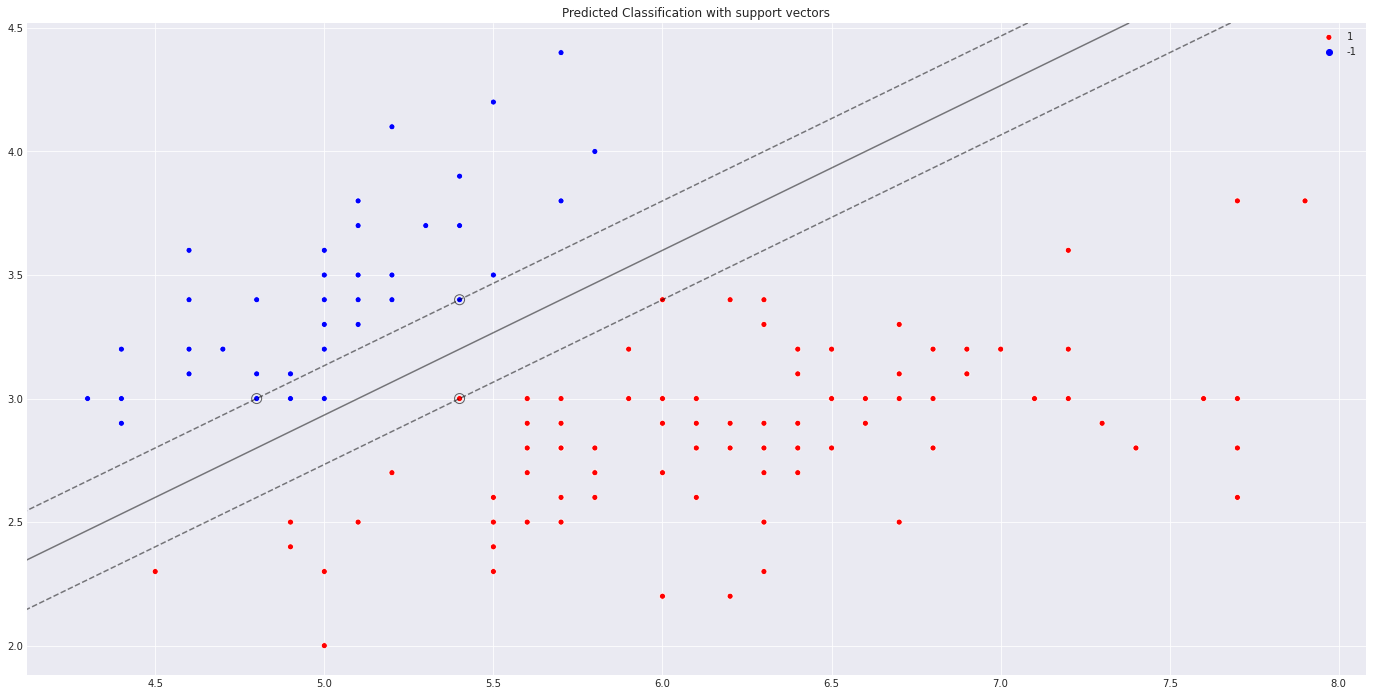

Average F1-Score 0.9955555555555555


In [23]:
svc = svm.SVC(
    kernel="linear", max_iter=20, C=20
)  # c=1, tol=10**-2, max_iter making difference,tol=10**-3
print("Model", svc)
avg_score = apply_model(svc, data, target)
print(f"Average F1-Score {avg_score}")
observations.append(["linear", "20", avg_score])

####  Testing with kernel type "poly" with 2 max-iterations and C=10

Model SVC(C=10, kernel='poly', max_iter=2)


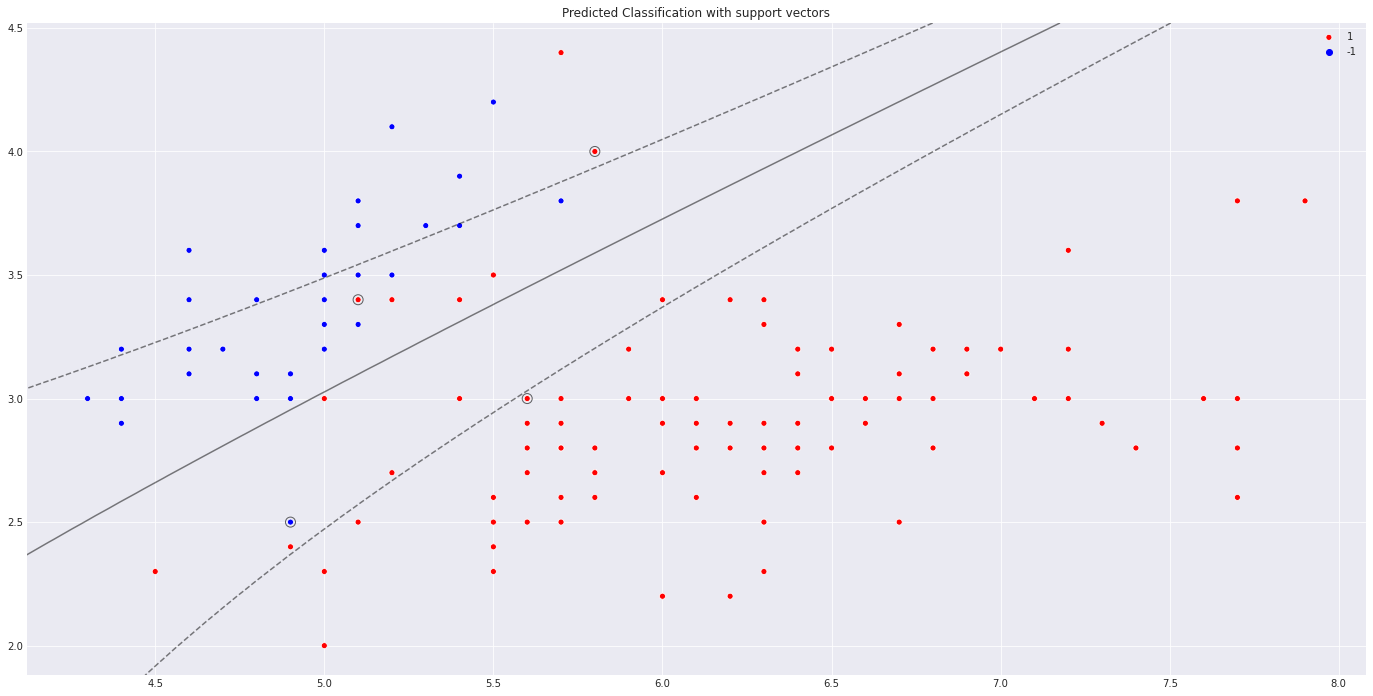

Average F1-Score 0.9392303982260509


In [15]:
svc = svm.SVC(kernel="poly", max_iter=2, C=10)  # c=1, tol=10**-2, max_iter making difference
print("Model", svc)
avg_score = apply_model(svc, data, target)
print(f"Average F1-Score {avg_score}")
observations.append(["poly", "2", avg_score])

####  Testing with kernel type "poly" with 20 max-iterations and C=20

Model SVC(C=20, kernel='poly', max_iter=20)


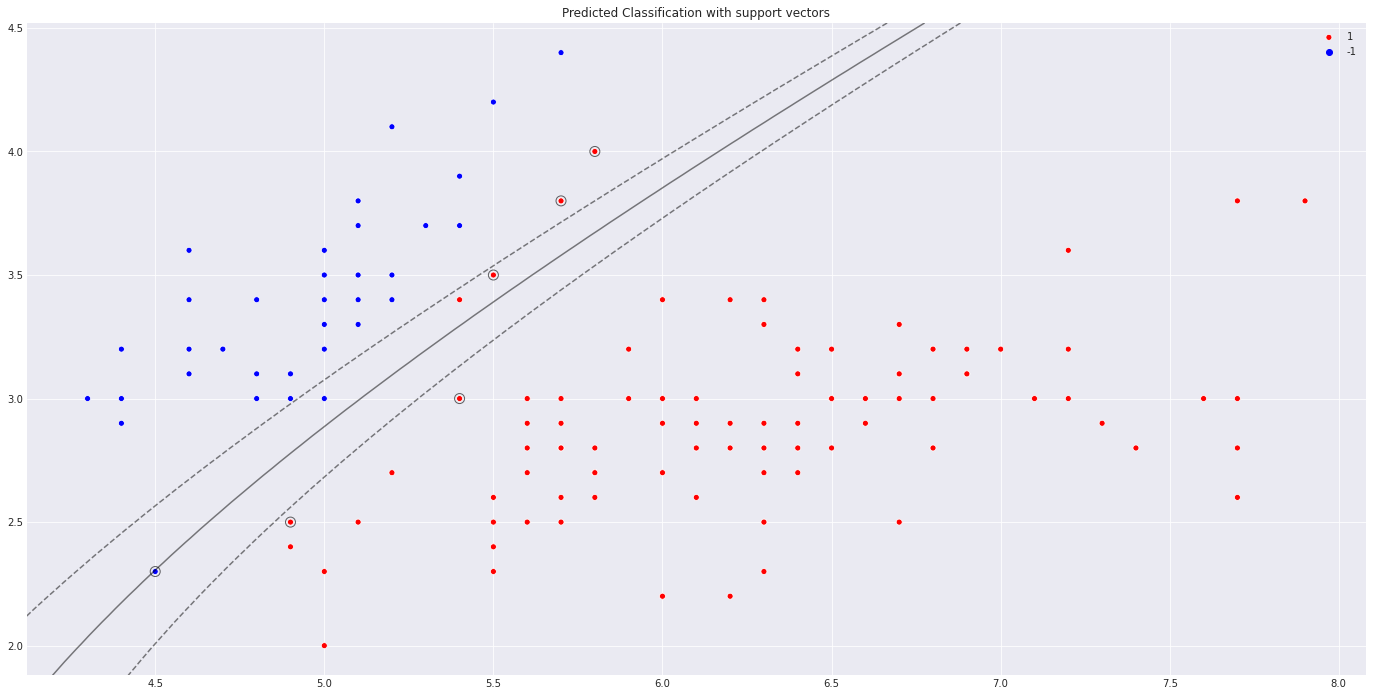

Average F1-Score 0.9741666666666667


In [16]:
svc = svm.SVC(kernel="poly", max_iter=20, C=20)  # c=1, tol=10**-2, max_iter making difference
print("Model", svc)
avg_score = apply_model(svc, data, target)
print(f"Average F1-Score {avg_score}")
observations.append(["poly", "20", avg_score])

####  Testing with kernel type "rbf" with 2 max-iterations and C=10

Model SVC(C=10, max_iter=2)


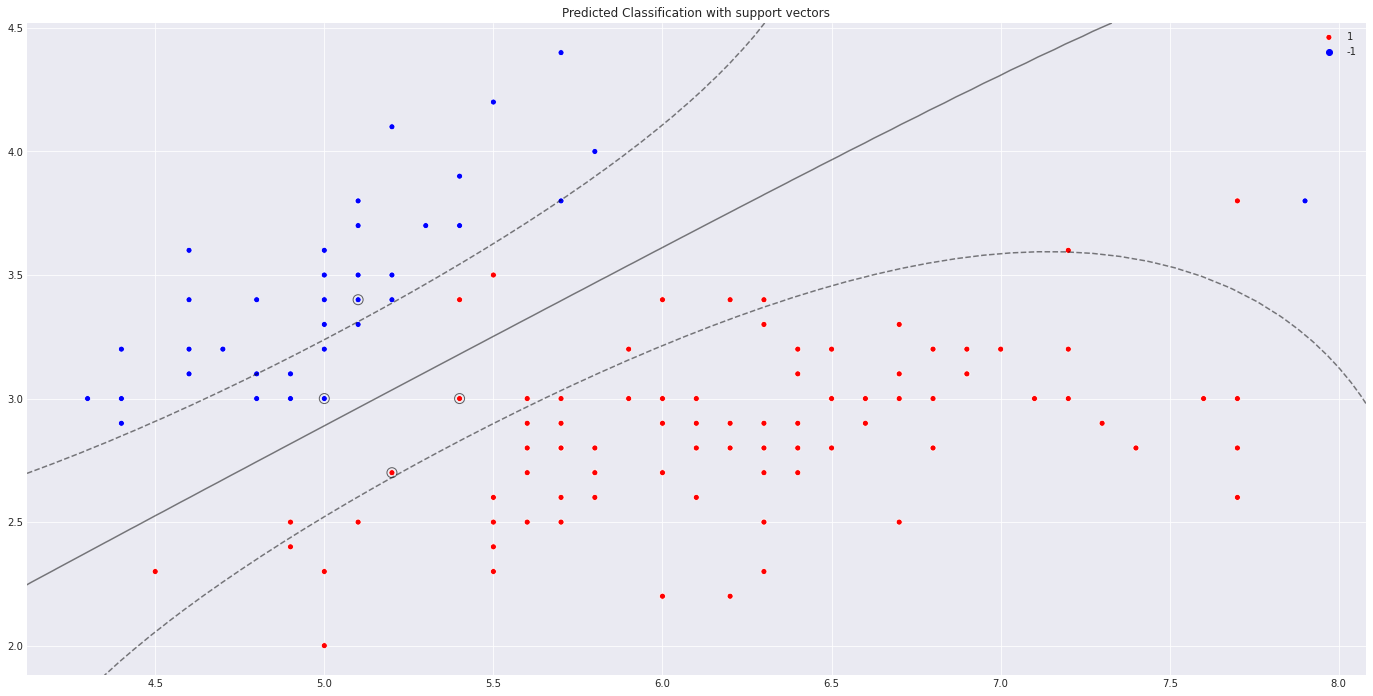

Average F1-Score 0.975091086079822


In [17]:
svc = svm.SVC(kernel="rbf", max_iter=2, C=10)  # c=1, tol=10**-2, max_iter making difference
print("Model", svc)
avg_score = apply_model(svc, data, target)
print(f"Average F1-Score {avg_score}")
observations.append(["rbf", "2", avg_score])

####  Testing with kernel type "rbf" with 20 max-iterations and C=20

Model SVC(C=20, max_iter=20)


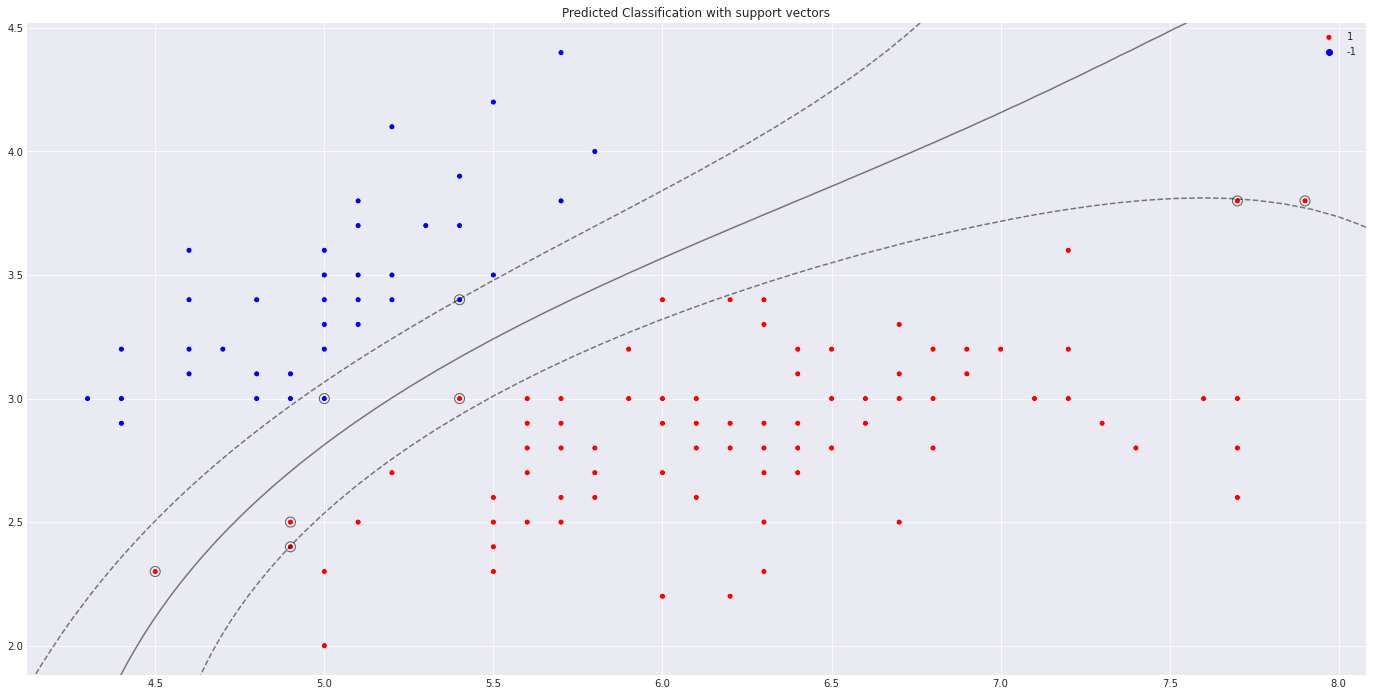

Average F1-Score 0.9939393939393939


In [18]:
svc = svm.SVC(kernel="rbf", max_iter=20, C=20)  # c=1, tol=10**-2, max_iter making difference
print("Model", svc)
avg_score = apply_model(svc, data, target)
print(f"Average F1-Score {avg_score}")
observations.append(["rbf", "20", avg_score])

### Comparison of above models with F1 scores

In [19]:
obs_df = pd.DataFrame(observations)
obs_df.columns= ["Kernel", "Number Of Max Iterations", "Mean F1-Score"]
obs_df.head(10)

,Kernel,Number Of Max Iterations,Mean F1-Score
0,linear,2,0.944523
1,linear,20,0.995918
2,poly,2,0.939230
3,poly,20,0.974167
4,rbf,2,0.975091
5,rbf,20,0.993939


In [20]:
mx = obs_df["Mean F1-Score"].max()
best_kernel = obs_df[obs_df["Mean F1-Score"] == mx]

In [21]:
print(f"Best performed kernel is {best_kernel.iloc[0,0]} with max-iterations {best_kernel.iloc[0,1]}")

Best performed kernel is linear with max-iterations 20
